## Final Project Submission

Please fill out:
* Student name: Oliver Zimmer
* Student pace: self paced
* Scheduled project review date: 22nd August 2022
* Instructor name: Morgan
* Blog post URL:


### Project Overview & Methodology

This is the end of **Phase 3 project of the Flatiron School Online Data Science course**, focusing on **Machine Learning Fundamentals**.

The task at hand is to build a classifier for the telecom business of **SyraTel**, to enable the company to reliably **predict customer churn** and hence focus on retainable consumers.

This is a **binary classification** problem (i.e. will the client be lost, yes or no?), trying to determine the churn via underlying patterns of customer data.

For this exercise I will explore a provided dataset, perform any adjustments and data cleaning necessary and finally apply machine learning algorithms for prediction.

The **Data Science process** followed for this project will be the **OSEMN** process (**O**btain, **S**crub, **E**xplore, **M**odel, i**N**terpret), sometimes also referred to as *OSEMiN*.

### Data base

The dataset provided is the **Churn in Telecom's dataset** from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

### Importing the necessary Python libraries and modules

The following javascript command disables output windows to appear in scrollable frames.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import the necessary libraries and modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols

import scipy.stats as stats

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from imblearn.over_sampling import SMOTE

import xgboost as xgb

import pickle

### Obtain

The first step in the OSEMN approach is simply importing the necessary data. I will also take a first quick glance at what I am dealing with.

In [3]:
# Load in CSV datafile
data = pd.read_csv('data/SyraTel_Customer_Data.csv')

In [4]:
display(data.head(10))
display(len(data))

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


3333

3,333 data entries are spread accross 21 columns, providing information such as state of residence, number of customer service calls, or length of calls.

### Scrub

This step involves cleaning the data to ensure it is viable for exploratory data analysis (EDA) and model building (i.e. deal with missing values, check data types and make corrections where necessary).

In [5]:
# Summarize the data to check for data types and null values at a glance
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

All variables appear to have the correct datatype, with the target variable "churn" being provided as boolean variable true/false. Since the features **international plan**, **voicemail plan** and **churn** are binary (yes/no or true/false), I will convert them into 1's (true) and 0's (false) to obtain consistency throughout the analysis. 

In [6]:
data['international plan'] = data['international plan'].map({'no': 0, 'yes': 1})
data['voice mail plan'] = data['voice mail plan'].map({'no': 0, 'yes': 1})
data['churn'] = data['churn'].map({False: 0, True: 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Missing values

While apparently none of the variables showcase null values, we might be dealing with missing values that should be taken care of.

In [7]:
# Check for missing values
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We are dealing with zero missing values across all variables. Finally I will check for any duplicate data.

In [8]:
duplicates = data[data.duplicated()]
display(len(duplicates))

0

The data set looks clean and we are ready to explore.

### Explore

Our ultimate goal is to find the best predictors relative to our target variable 'churn'. I will therefore begin by exploring the relationship between various (potential) predictors and their relationship to our target variable. Our question here is: **Does the column provide relevant information?**

#### Customer Location: Area code & Phone number

<AxesSubplot:xlabel='area code', ylabel='count'>

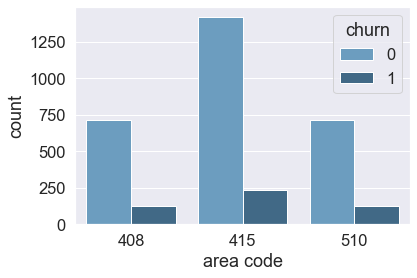

In [114]:
sns.countplot(x='area code', hue='churn', data=data, palette='Blues_d')

While there are only a total of three different area codes for all customers in the dataset, it is more than an educated guess to assume an equal number of phone numbers as there are customers. This would then be indicative of not providing information relevant to our prediction goals and could hence phone number could be eliminated.

In [10]:
num = data['phone number'].nunique()
print(f'Number of phone numbers in the dataset: {num}')

Number of phone numbers in the dataset: 3333


As assumed this column can be safely dropped without losing predictive insight.

In [11]:
data.drop('phone number', axis = 1, inplace = True)

Rather than having information about the **total number of minutes, calls and charge** separated into **day, evening, night and international**, it appears to be more efficient to simply add those three stages of the day together, thus rendering data more efficiently while not losing pivotal information.

In [12]:
data['day charge per min'] = round(data['total day charge'] / (data['total day minutes']), 2)
data['eve charge per min'] = round(data['total eve charge'] / (data['total eve minutes']), 2)
data['night charge per min'] = round(data['total night charge'] / (data['total night minutes']), 2)
data['intl charge per min'] = round(data['total intl charge'] / (data['total intl minutes']), 2)

In [13]:
# sum of total minutes per call per customer
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']
# sum of total calls per customer
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls']
# sum of  total charges per customer
data['total charge'] = data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge']

In [14]:
data['day charge per call'] = round(data['total day charge'] / (data['total day calls']), 2)
data['eve charge per call'] = round(data['total eve charge'] / (data['total eve calls']), 2)
data['night charge per call'] = round(data['total night charge'] / (data['total night calls']), 2)
data['intl charge per call'] = round(data['total intl charge'] / (data['total intl calls']), 2)

I will check whether these divisions have introduced NaN values that need to be dealt with.

In [15]:
data.isna().sum()

state                      0
account length             0
area code                  0
international plan         0
voice mail plan            0
number vmail messages      0
total day minutes          0
total day calls            0
total day charge           0
total eve minutes          0
total eve calls            0
total eve charge           0
total night minutes        0
total night calls          0
total night charge         0
total intl minutes         0
total intl calls           0
total intl charge          0
customer service calls     0
churn                      0
day charge per min         2
eve charge per min         1
night charge per min       0
intl charge per min       18
total minutes              0
total calls                0
total charge               0
day charge per call        2
eve charge per call        1
night charge per call      0
intl charge per call      18
dtype: int64

I will circumvent NaN values (most likely caused by division through zero) and their impending problems in the later algorithms by adding very small values to each of the predictors affected.

In [16]:
data['day charge per call'] = round(data['total day charge'] / (data['total day calls'] + 0.0000000001), 2)
data['eve charge per call'] = round(data['total eve charge'] / (data['total eve calls'] + 0.0000000001), 2)
data['intl charge per call'] = round(data['total intl charge'] / (data['total intl calls'] + 0.0000000001), 2)
data['day charge per min'] = round(data['total day charge'] / (data['total day minutes'] + 0.0000000001), 2)
data['eve charge per min'] = round(data['total eve charge'] / (data['total eve minutes'] + 0.0000000001), 2)
data['intl charge per min'] = round(data['total intl charge'] / (data['total intl minutes'] + 0.0000000001), 2)
data.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
day charge per min        0
eve charge per min        0
night charge per min      0
intl charge per min       0
total minutes             0
total calls               0
total charge              0
day charge per call       0
eve charge per call       0
night charge per call     0
intl charge per call      0
dtype: int64

Next, it might be interesting to see how customer churn is presented across the different states.

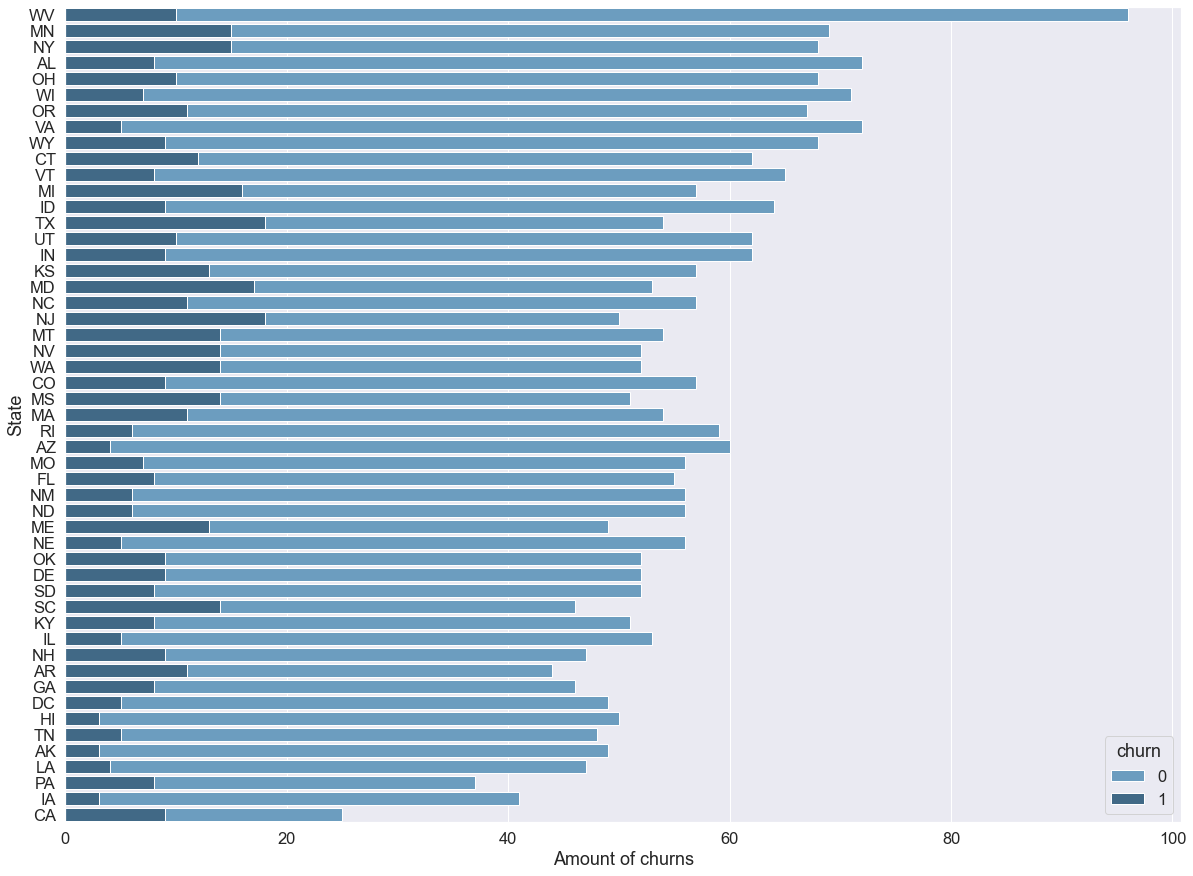

In [113]:
plt.figure(figsize = (20,15)) 
sns.set(font_scale = 1.5)     
sns.countplot(y = 'state', hue = 'churn',  order = data['state'].value_counts().index, dodge = False, data = data, palette='Blues_d')
plt.ylabel("State")
plt.xlabel("Amount of churns");

While there was an uneven distribution of churns among the different states to be expected, this analysis might be distorted considering the different sizes of population in each state. As of 2021, California has the highest population count at 39.24m, while Wyoming is the least populated state with 0.58m residents (source: [statista](https://www.statista.com/statistics/183497/population-in-the-federal-states-of-the-us/)).

As a remedy, percentages could be applied. However, for this analysis I will proceed as is.

## Explore
After the data has been scrubbed and any adjustments necessary have been made, it is time to actually explore the dataset in order to build the best predictive model.

I begin by looking at the overall churn vs. no churn ratio.

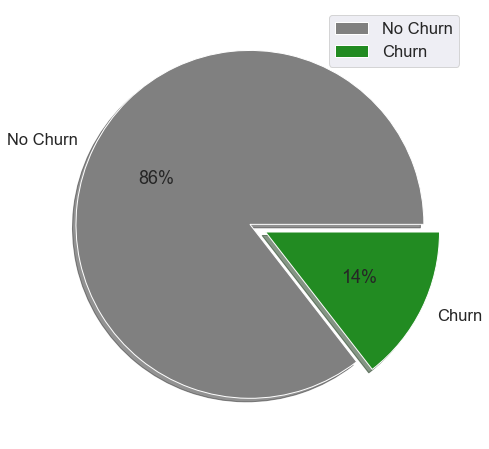

In [104]:
value_counts = np.array(data['churn'].value_counts())
labels = ["No Churn", "Churn"]
explode = (0, 0.1)
plt.figure(figsize = (12,8))
plt.pie(value_counts, explode = explode, shadow = True, colors = ['grey','forestgreen'], labels = labels, autopct='%1.0f%%');
plt.legend()
plt.show()

Another interesting aspect is the distribution of floating integer datatypes.

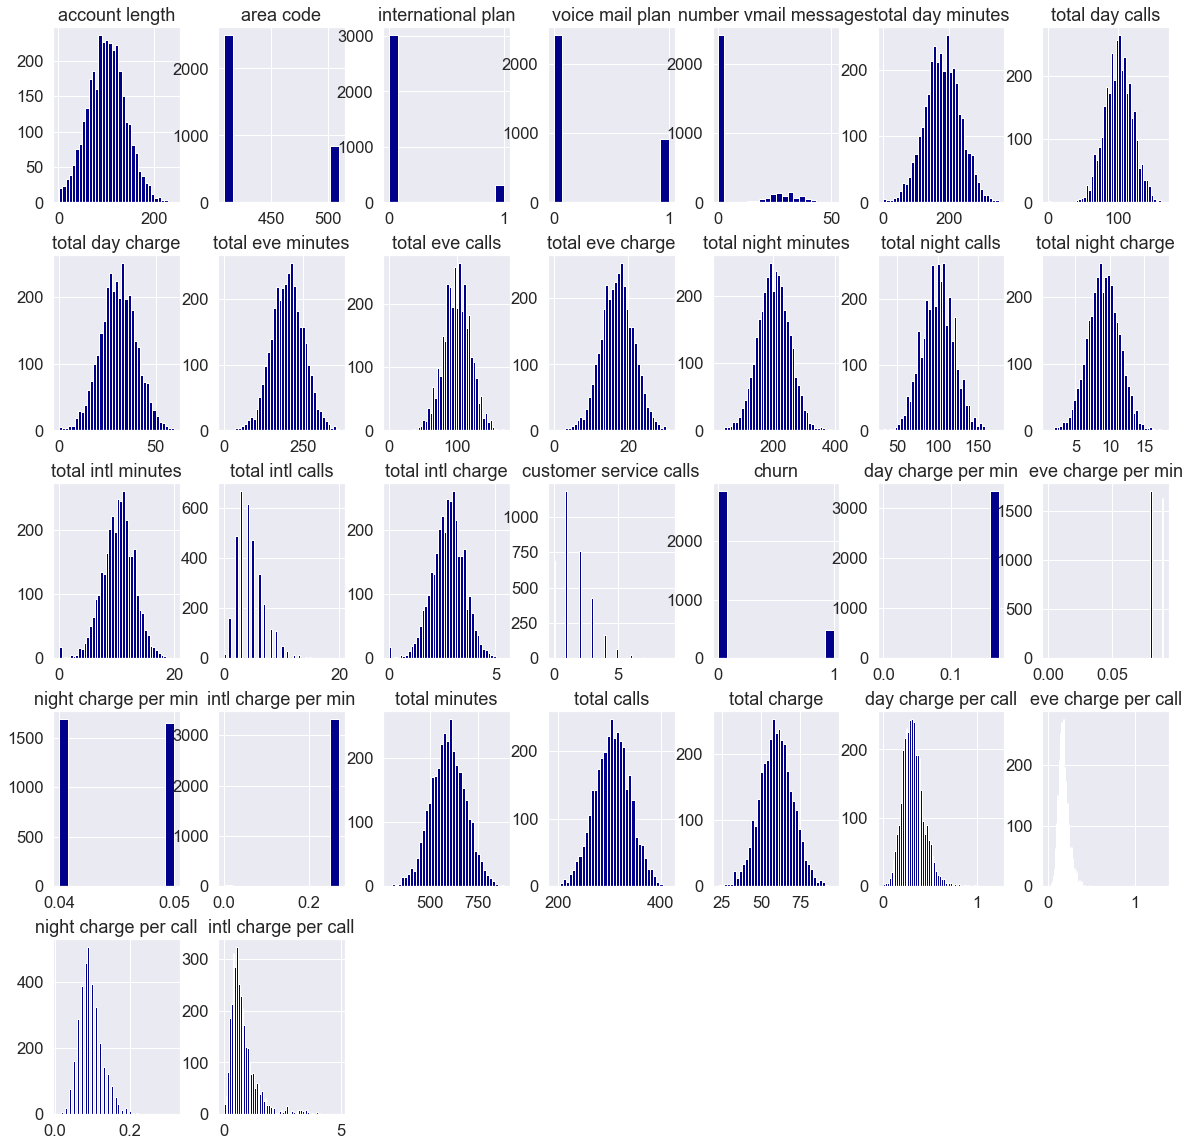

In [106]:
data.hist(bins = 'auto', layout = (5,7), figsize = (20,20), color = ['darkblue'])
plt.show()

Most variables are normally distributed with some exhibiting positive skewness.

Continuing with the churn analysis it might be worth checking how 'churn-prone' the individual states are.

In [20]:
data_churn = pd.DataFrame(data.groupby('state')['churn'].value_counts(normalize = True))
data_churn.columns = ['value']
data_churn = data_churn.reset_index()

In [21]:
top_states = list(data_churn.state[(data_churn.churn == 1) & (data_churn.value > .2)])
data_churn.state[(data_churn.churn == 1) & (data_churn.value > .2)]

9     CA
41    MD
43    ME
45    MI
51    MS
53    MT
63    NJ
67    NV
81    SC
87    TX
95    WA
Name: state, dtype: object

With the above states exhibiting the greatest churn rates, it would be worth the effort of examining the competitive landscape and thus possible substitutes for customers in these states.
Below is a catplot providing an overall view of churn rates by state:

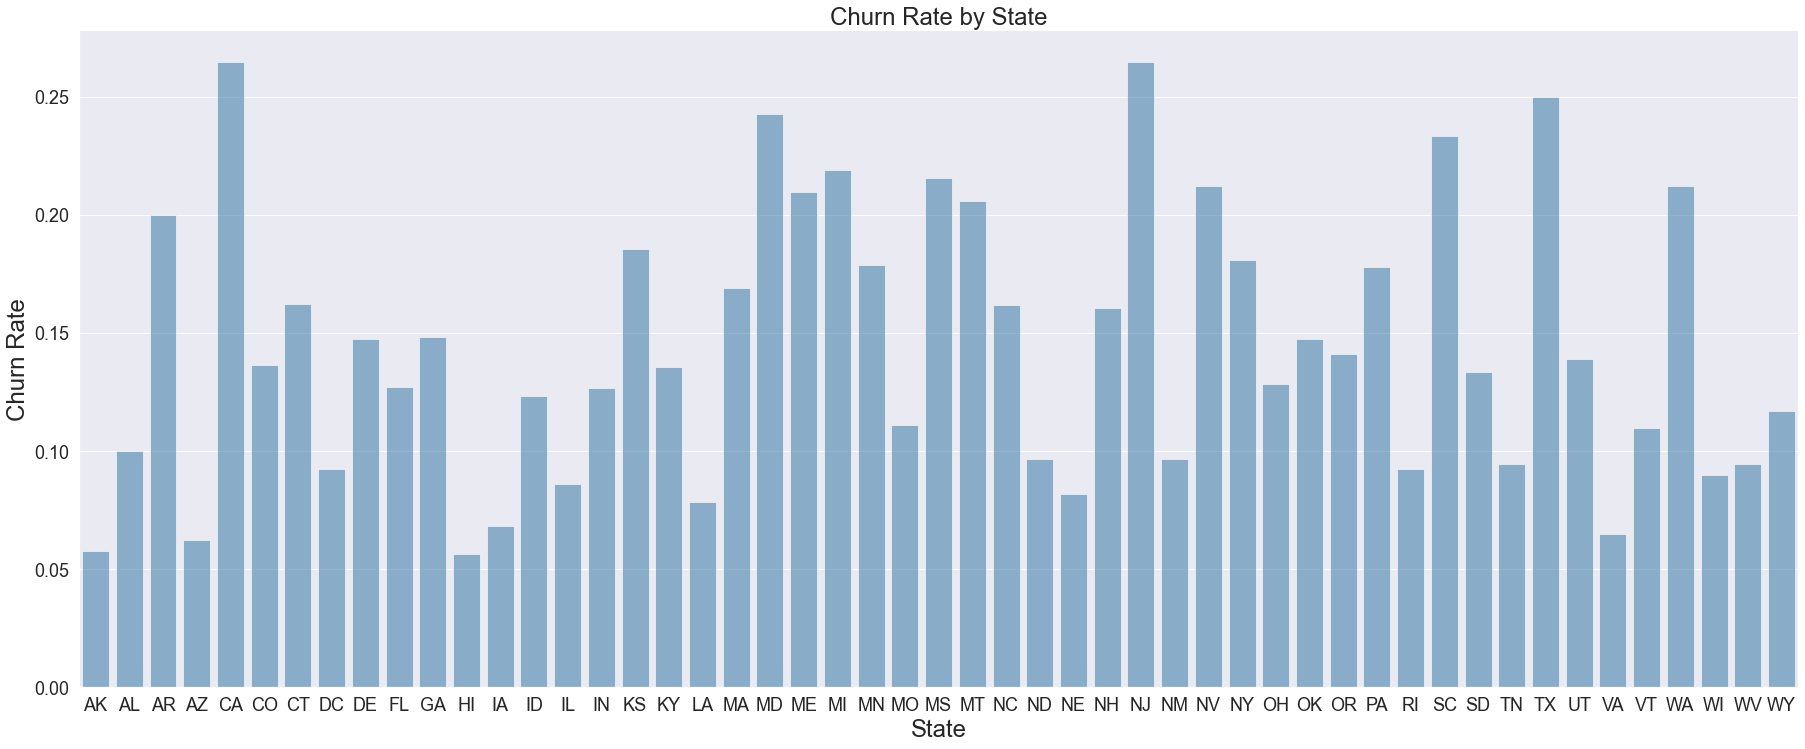

In [112]:
sns.set(font_scale = 1.5) ;                                                 
sns.catplot(data = data_churn[data_churn.churn == 1], kind = 'bar',
            x = 'state', y = 'value', hue = 'churn',
            palette = 'Blues_d', alpha = .6, height = 10, aspect = 2.5, legend = False);
plt.title('Churn Rate by State', fontsize = 24);
plt.xlabel('State', fontsize = 24)
plt.ylabel('Churn Rate', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

While the analysis of individual states is cumbersome and not providing additional insights for the current project, a clustering of states into different regions provides a more compact view. In order to achieve this, I will rely on the division into regions by the [US Census Bureau](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf) and recreate that clustering into **four main regions**.

In [23]:
northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
south = ['DE','FL','GA','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','SD','ND']
west = ['AZ', 'CO','ID', 'MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']

region = []

for state in data.state:
    if state in northeast:
        region.append('Northeast')
    elif state in south:
        region.append('South')
    elif state in midwest:
        region.append('Midwest')
    elif state in west:
        region.append('West')

data['region'] = region

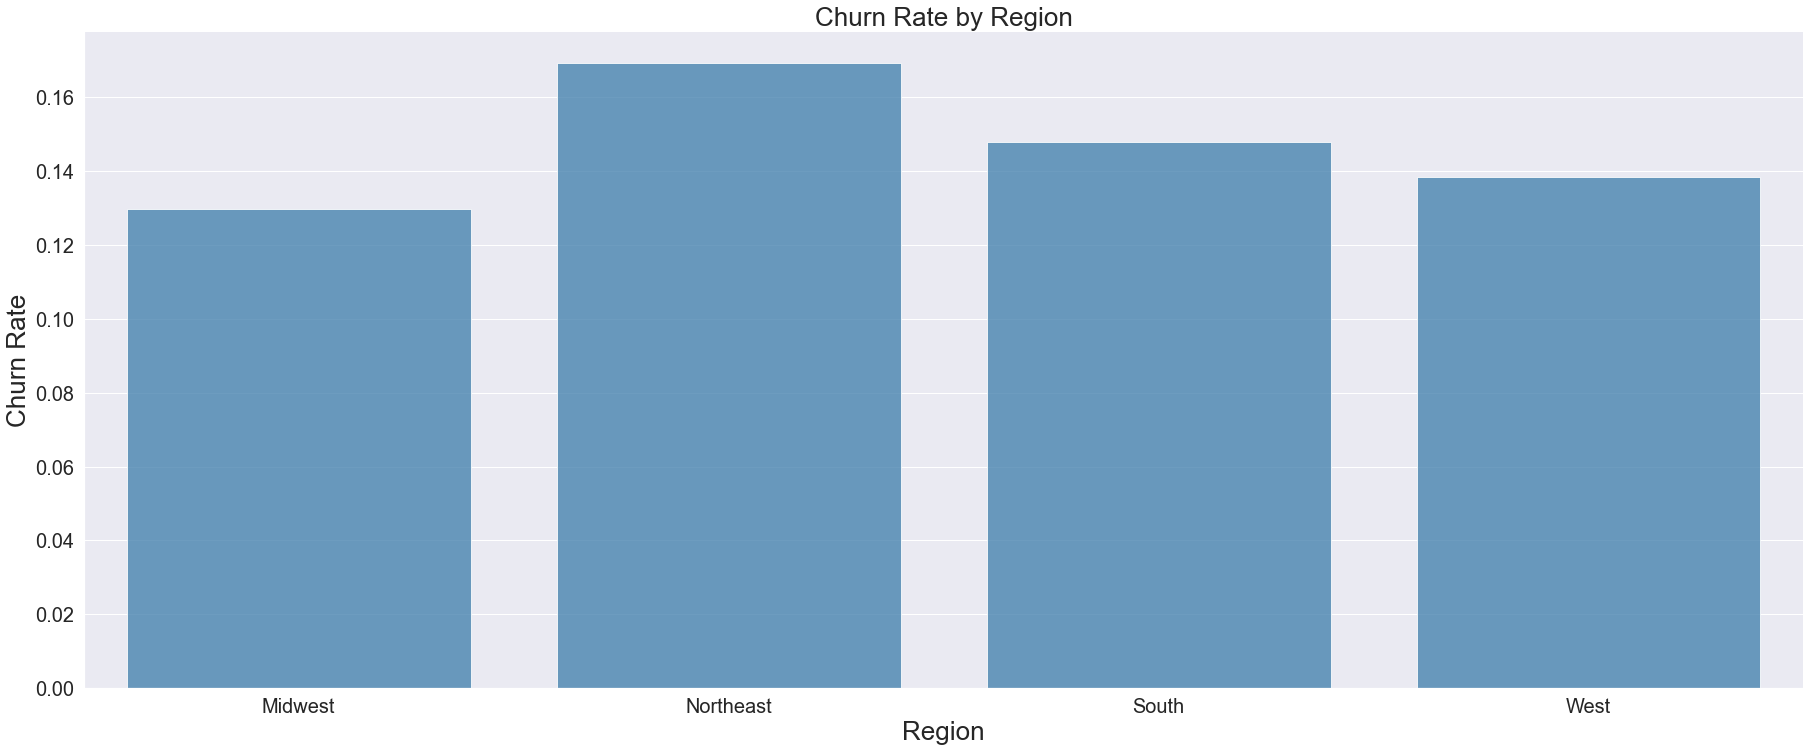

In [111]:
data_region = pd.DataFrame(data.groupby('region')['churn'].value_counts(normalize=True))
data_region.columns = ['value']
data_region = data_region.reset_index()
g = sns.catplot(data = data_region[data_region.churn == 1], kind = 'bar',
            x = 'region', y = 'value', hue = 'churn',
            palette = 'Blues_d', alpha = .8, height = 10, aspect = 2.5, legend = False);
plt.title('Churn Rate by Region', fontsize = 26)
plt.xlabel('Region', fontsize = 26)
plt.ylabel('Churn Rate', fontsize = 26)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [25]:
data_region[(data_region.churn == 1)]

,region,churn,value
1,Midwest,1,0.129676
3,Northeast,1,0.169205
5,South,1,0.147881
7,West,1,0.138387


As becomes apparent from the above bar graph, the Northeast and South region states are dealing with the highest overall churn rates. As before, in-depth analysis of competitors in these regions might prove useful in order to alleviate customer churn.

In an ever more competitive market, customers have a plethora of choices of service providers. Where it is not possible to differentiate onself from one's peer by qualitative aspects, customers might be looking merely for price. Therefore it seems rational to take a look as to how total charge is related to churn rate.

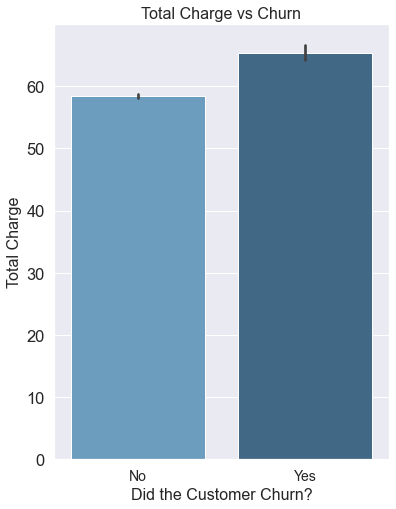

In [110]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.barplot(x = 'churn', y = 'total charge', palette = 'Blues_d', data = data)
plt.title('Total Charge vs Churn',fontsize = 16)
plt.ylabel('Total Charge',fontsize = 16)
plt.xlabel('Did the Customer Churn?',fontsize = 16)
g.set_xticklabels(["No",'Yes'], fontsize = 14)
plt.savefig('images/total charge.png',transparent=True)
plt.show()

Yes, the higher the charge the larger the churn rate, but is not a striking or revelatory imbalance. Other aspects must play a role, like the impact of customer service calls on customer churn rate.

In [27]:
data.groupby('churn')['customer service calls'].mean()

churn
0    1.449825
1    2.229814
Name: customer service calls, dtype: float64

Apparently, more customer service calls are made by customers that are also more likely to churn. This is evidenced also throughout every US region.

In [28]:
data.groupby(['region','churn'])['customer service calls'].mean()

region     churn
Midwest    0        1.383954
           1        2.057692
Northeast  0        1.429735
           1        2.140000
South      0        1.503704
           1        2.292683
West       0        1.456704
           1        2.373913
Name: customer service calls, dtype: float64

I will visualize this relationship with a respective bar chart and box plot.

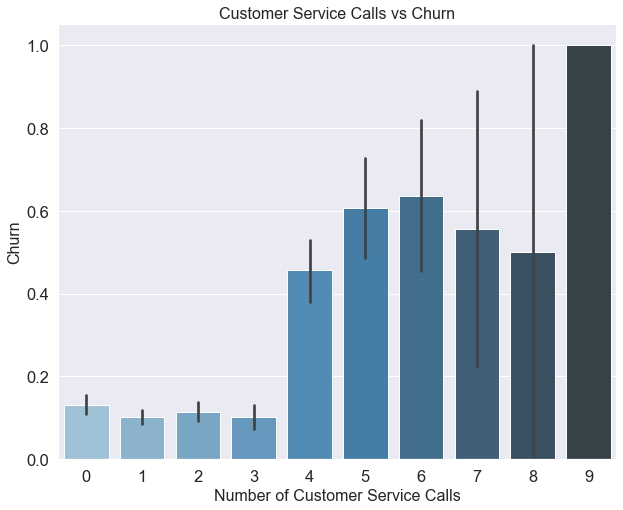

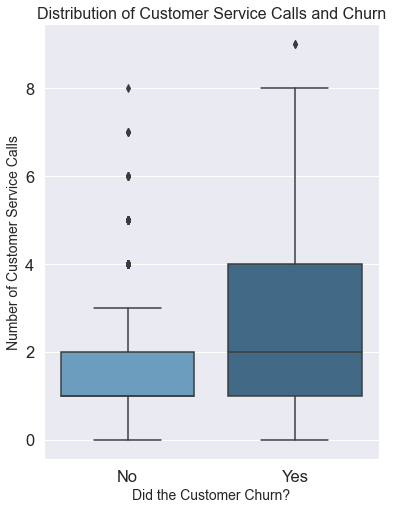

In [29]:
customer_service_calls = data.groupby('customer service calls')['churn'].agg(['count'])
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.barplot(x = 'customer service calls', y = 'churn', palette = 'Blues_d', data = data)
plt.xlabel('Number of Customer Service Calls',fontsize = 16)
plt.ylabel('Churn',fontsize = 16)
plt.title('Customer Service Calls vs Churn',fontsize = 16)
plt.savefig('images/customer_service_calls.png',transparent=True)

plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.boxplot(x = 'churn', y = 'customer service calls', data = data, palette = 'Blues_d')
plt.title('Distribution of Customer Service Calls and Churn',fontsize = 16)
plt.ylabel('Number of Customer Service Calls',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'])
plt.show()

Interestingly enough, the **more customer service calls a customer makes, the more likely the customer is to actually churn**. This naturally begs the question as to what the customer service is doing and my initial suggestion is to investigate the quality of customer service, whose priority it should be to service the customer in such a way as to avoid him/her churning. But as the figure suggests, there is a certain threshold at four calls, after which the likelihood of churning strongly increases. Taking into consideration the number of customer calls made and initiaing discounts, bonuses or similar special service offerings accordingly, might be able to appease these customers.

The analysis can be deepened by checking if the customers making service calls are on an international plan.

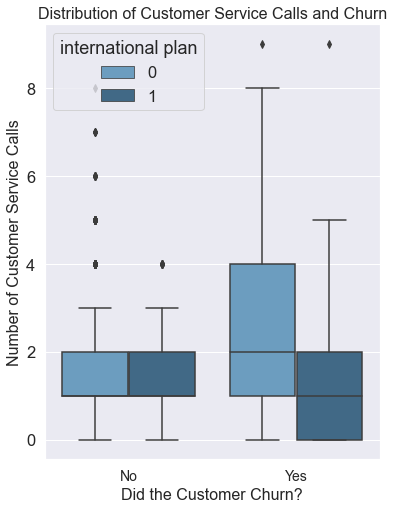

In [30]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.boxplot(x = 'churn', y = 'customer service calls', hue = 'international plan',  palette = "Blues_d", data = data)
plt.title('Distribution of Customer Service Calls and Churn',fontsize = 16)
plt.ylabel('Number of Customer Service Calls',fontsize = 16)
plt.xlabel('Did the Customer Churn?',fontsize = 16)
g.set_xticklabels(["No",'Yes'], fontsize = 14)
plt.show(g)

Customer **churn is even more likely when customers are not on an international plan**. As such, this is another aspect that should be taken into consideration when attempting to reduce churn rates.

### Model

After Obtaining, Scrubbing and Exploring the data, it is now time to come to the meat of the project by building models in order to predict the likelihood of customer churn.

In the following section I will employ a variety of models and analyze the same criteria repeatedly for comparison purposes (e.g. confusion matrix and Receiver Operating Characteristic (ROC) Curve to illustrate the true positive rate against the false positive rate of our classifier). Therefore, I will first define some functions to be reused for each individual model:

In [31]:
# Create a table to store the different model results
models = pd.DataFrame({'Model': [], 'Description': [], 'Test Score': [], 'Train Score': [],'Precision': [],'Recall': [], 'F1-Score':[]})

In [32]:
def plt_roc(model, X_train, X_test, y_train, y_test):
    
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    y_train_score = model.decision_function(X_train)
    y_test_score = model.decision_function(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print()
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color = 'blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'darkorange',
             lw=lw, label='Test ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [33]:
def plt_roc_prob(model, X_train, X_test, y_train, y_test):
    
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print()
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [34]:
def confusion_matrix(model, X_test, y_test, name):

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred) * 100
    
    print()
    print(f'Testing Accuracy Score for the {name} Classifier: {round(score,3)}%')
    print()
    print('Classification Matrix:')
    print(classification_report(y_test, y_pred))

In [35]:
def plt_feature_importances(model, X, X_train, pipe, name):
    
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    
    if pipe:
        plt.barh(range(n_features), model.steps[1][1].feature_importances_, align='center') 
    else:
        plt.barh(range(n_features), model.feature_importances_, align='center')
        
    plt.yticks(np.arange(n_features), X.columns.values, fontsize=13) 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)
    plt.savefig(f'images/feature_importance_{name}.png',transparent=True, bbox_inches='tight')

Before running any model, I will **split the data into a test and training set**, while also eliminating any variable that will not be of use in these models due to its object datatype.

In [36]:
y = data['churn']
X = data.drop(['churn', 'state', 'area code','region'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [37]:
plt.rcParams.update({'font.size': 16})

## Logistic Regression Model

In [38]:
scaler = StandardScaler()
model = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear',
                           class_weight='balanced', 
                           max_iter=10000, 
                           random_state=123) 
pipe_logreg = Pipeline(steps=[('ss', scaler), 
                              ('m', model)])

pipe_logreg.fit(X_train, y_train)

preds = pipe_logreg.predict(X_test)

print('Train Score:', pipe_logreg.score(X_train, y_train))
print('Test Score:', pipe_logreg.score(X_test, y_test))

Train Score: 0.7689422355588897
Test Score: 0.7796101949025487


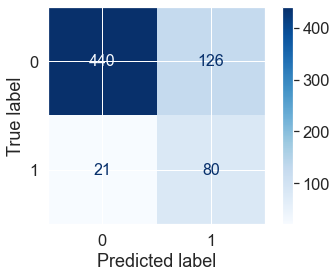


Testing Accuracy Score for the Logistic Regression Classifier: 77.961%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.79      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667





Train AUC: 0.8257832772485123
Test AUC: 0.8423888325228284



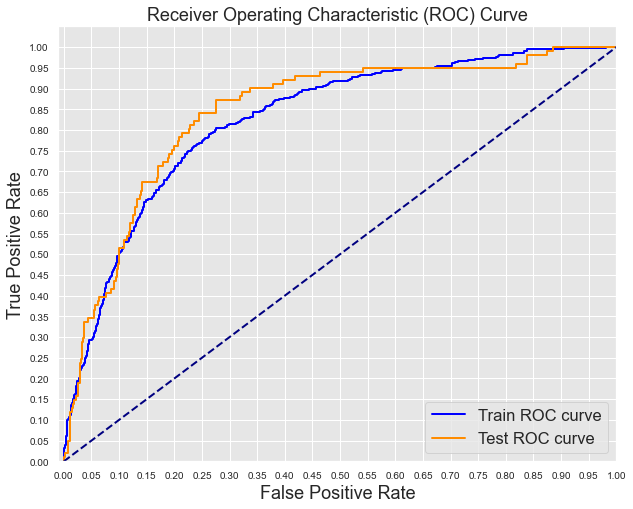

In [39]:
confusion_matrix(pipe_logreg, X_test, y_test, 'Logistic Regression')
print('\n' * 3)
plt_roc(pipe_logreg, X_train, X_test, y_train, y_test)

In [40]:
models.loc[0] = ['Logistic Regression', 'Base', pipe_logreg.score(X_test, y_test), pipe_logreg.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

77.96 % of the test dataset are predicted correctly by the logistic regression model, which is a good start but leaves room for improvement. It is also noteworthy that there are more false negative (126) than true negative (80), which could be improved.

I will adress these issues by employing **Synthetic Minority Oversampling (SMOTE)** on the training set, to counter potentially severe class imbalance.

In [41]:
print(y_train.value_counts())
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 
print(y_train_resampled.value_counts())

0    2284
1     382
Name: churn, dtype: int64
1    2284
0    2284
Name: churn, dtype: int64


As can be seen from above, resampling of the train data has eliminated the previous class imbalance.

In [42]:
pipe_logreg.fit(X_train_resampled, y_train_resampled)
preds = pipe_logreg.predict(X_test)

print('Train Score:', pipe_logreg.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipe_logreg.score(X_test, y_test))

Train Score: 0.9028021015761821
Test Score: 0.8620689655172413


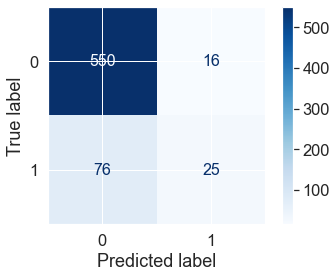


Testing Accuracy Score for the Logistic Regression Classifier: 86.207%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       566
           1       0.61      0.25      0.35       101

    accuracy                           0.86       667
   macro avg       0.74      0.61      0.64       667
weighted avg       0.84      0.86      0.84       667





Train AUC: 0.9605770439913999
Test AUC: 0.829741454710842



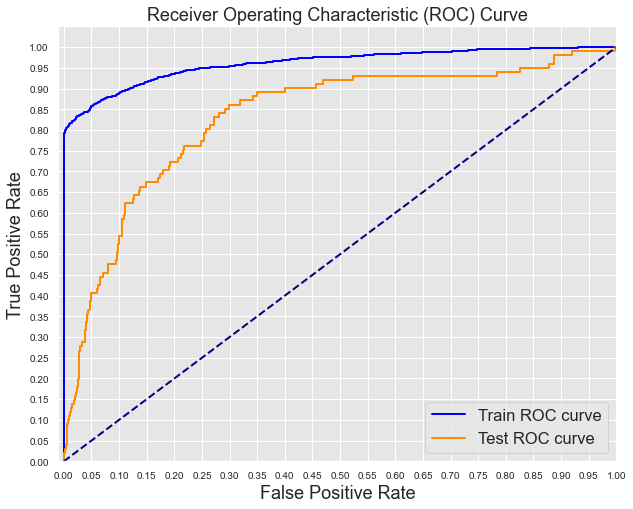

In [43]:
confusion_matrix(pipe_logreg, X_test, y_test, 'Logistic Regression')
print('\n' * 3)
plt_roc(pipe_logreg, X_train_resampled, X_test, y_train_resampled, y_test)

In [44]:
models.loc[1] = ['Logistic Regression', 'SMOTE', pipe_logreg.score(X_test, y_test), pipe_logreg.score(X_train_resampled, y_train_resampled), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

### Logistic Regression Model - Discussion

By simply applying the SMOTE technique, the logistic regression model has improved the testing accuracy from 77.96% to 85.75%.

Furthermore, as can be seen from the ROC curve, the train and test area under the curve (AUC) have also improved from 82.57% to 84.23%, respectively.

### K-Nearest Neighbours

Using nearby points in order to generate a prediction, the supervised learning algorithm K-Nearest Neighbours (KNN) is another effective classification algorithm. I will again first split the train-test set and first apply a predefined user constant of 5, while also employing a pipeline

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors=5)


pipe_knn = Pipeline(steps=[('ss', scaler), 
                           ('m', knn_clf)])

pipe_knn.fit(X_train, y_train)

preds = pipe_knn.predict(X_test)

print('Train Score:', pipe_knn.score(X_train, y_train))
print('Test Score:', pipe_knn.score(X_test, y_test))

Train Score: 0.921980495123781
Test Score: 0.8980509745127436


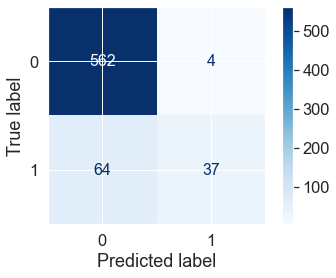


Testing Accuracy Score for the KNN Classifier: 89.805%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       566
           1       0.90      0.37      0.52       101

    accuracy                           0.90       667
   macro avg       0.90      0.68      0.73       667
weighted avg       0.90      0.90      0.88       667





Train AUC: 0.9616499023482271
Test AUC: 0.850627995661757



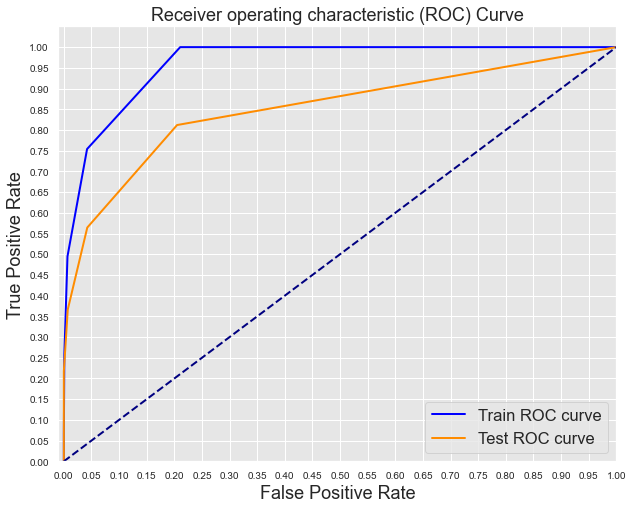

In [46]:
confusion_matrix(pipe_knn, X_test, y_test, 'KNN')
print('\n' * 3)
plt_roc_prob(pipe_knn, X_train, X_test, y_train, y_test)

In [47]:
models.loc[2] = ['KNN', 'Base', pipe_knn.score(X_test, y_test), pipe_knn.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

Although already showcasing a better accuracy than the previous logistic regression model, I have yet to address class imbalance. Let's see if the results improve.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors=5)


pipe_knn = Pipeline(steps=[('ss', scaler), 
                           ('m', knn_clf)])

pipe_knn.fit(X_train_resampled, y_train_resampled)

preds = pipe_knn.predict(X_test)

print('Train Score:', pipe_knn.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipe_knn.score(X_test, y_test))

Train Score: 0.9274042950513539
Test Score: 0.7949640287769785


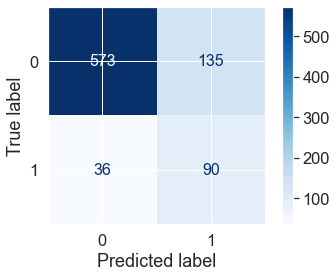


Testing Accuracy Score for the KNN Classifier: 79.496%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       708
           1       0.40      0.71      0.51       126

    accuracy                           0.79       834
   macro avg       0.67      0.76      0.69       834
weighted avg       0.86      0.79      0.82       834





Train AUC: 0.9935555921715091
Test AUC: 0.8175556003945834



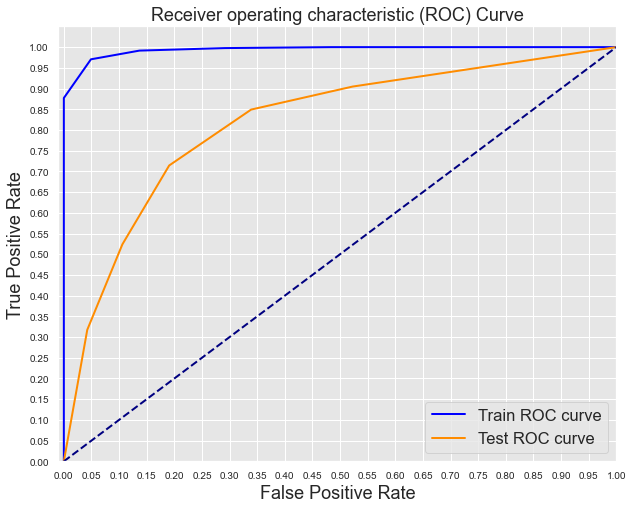

In [49]:
confusion_matrix(pipe_knn, X_test, y_test, 'KNN')
print('\n' * 3)
plt_roc_prob(pipe_knn, X_train_resampled, X_test, y_train_resampled, y_test)

In [50]:
models.loc[3] = ['KNN', 'SMOTE', pipe_knn.score(X_test, y_test), pipe_knn.score(X_train_resampled, y_train_resampled), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

The SMOTE approach will no longer be used for KNN, since it led to significantly worse results. There is still potential for improvement by determining the best number of user constant (i.e. neighbours) as input parameter for this classifier is.

In [51]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    
    best_k = 0
    best_score = 0.0
    best_k_auc = 0
    best_auc = 0
    
    for k in range(min_k, max_k+1, 2):
        scaler = StandardScaler()
        knn = KNeighborsClassifier(n_neighbors=k)
        pipe_knn = Pipeline(steps=[('ss', scaler), 
                                   ('m', knn)])
        pipe_knn.fit(X_train, y_train)
        preds = pipe_knn.predict(X_test)
        test_acc = pipe_knn.score(X_test, y_test)
        y_test_score = pipe_knn.predict_proba(X_test)
        
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
        test_auc = auc(test_fpr, test_tpr)
        
        y_train_score = pipe_knn.predict_proba(X_train)
        
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
        train_auc = auc(train_fpr, train_tpr)
        
        test_score = np.mean(np.array([test_acc,test_auc,train_auc]))
        
        if test_score > best_score:
            best_k = k
            best_score = test_score
            
    print("Best Value for k: {}".format(best_k))
    print("Test Accuracy Score: {}".format(best_score))
    return best_k

In [52]:
k = find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=20)

Best Value for k: 11
Test Accuracy Score: 0.9019895830061894


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors = k)


pipe_knn = Pipeline(steps=[('ss', scaler), 
                              ('m', knn_clf)])

pipe_knn.fit(X_train, y_train)

preds = pipe_knn.predict(X_test)

print('Train Score:', pipe_knn.score(X_train, y_train))
print('Test Score:', pipe_knn.score(X_test, y_test))

Train Score: 0.9007603041216486
Test Score: 0.8812949640287769


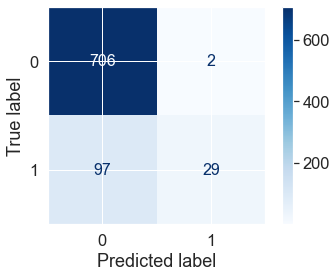


Testing Accuracy Score for the KNN Classifier: 88.129%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       708
           1       0.94      0.23      0.37       126

    accuracy                           0.88       834
   macro avg       0.91      0.61      0.65       834
weighted avg       0.89      0.88      0.85       834





Train AUC: 0.9406331159914947
Test AUC: 0.8840406689982963



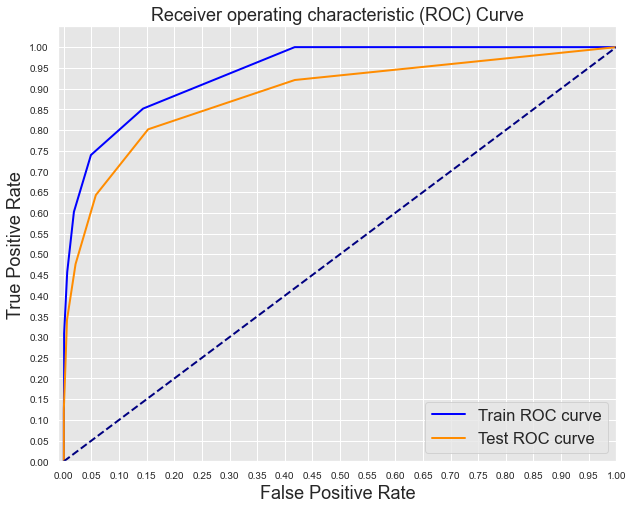

In [54]:
confusion_matrix(pipe_knn, X_test, y_test, 'KNN')
print('\n' * 3)
plt_roc_prob(pipe_knn, X_train, X_test, y_train, y_test)

In [55]:
models.loc[4] = ['KNN', 'Best k', pipe_knn.score(X_test, y_test), pipe_knn.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

### K-Nearest Neighbours - Discussion

Identifying the best value for k in order to maximize accuracy improves the test scroe from 81% (k = 5) to 88%. The areas under the curve are also slightly better than in the logistic regression model, as is the amount of false negative results in the confusion matrix.

### Decision Trees

Next I will partition the sample space into sets with similar data points until the value for new data points can reasonably be predicted from an (almost) homogenous set. 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
scaler = StandardScaler()
dt_clf = DecisionTreeClassifier(random_state = 23)

pipe_dt = Pipeline(steps=[('ss', scaler), 
                          ('m', dt_clf)])

pipe_dt.fit(X_train, y_train)

preds = pipe_dt.predict(X_test)

print('Train Score:', pipe_dt.score(X_train, y_train))
print('Test Score:', pipe_dt.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9505247376311844


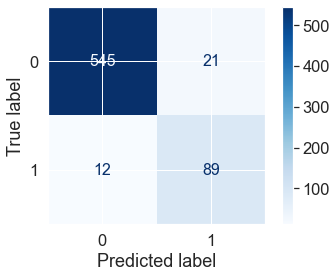


Testing Accuracy Score for the Decision Tree Classifier: 95.052%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       566
           1       0.81      0.88      0.84       101

    accuracy                           0.95       667
   macro avg       0.89      0.92      0.91       667
weighted avg       0.95      0.95      0.95       667





Train AUC: 1.0
Test AUC: 0.9220428226568239



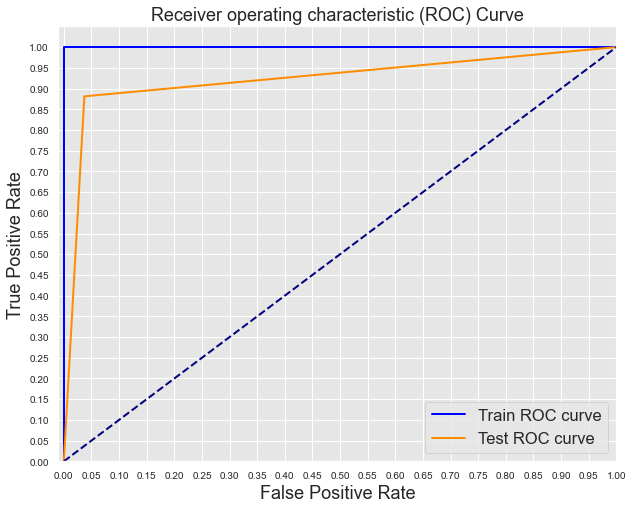

In [57]:
confusion_matrix(pipe_dt, X_test, y_test, 'Decision Tree')
print('\n' * 3)
plt_roc_prob(pipe_dt, X_train, X_test, y_train, y_test)

In [58]:
models.loc[5] = ['Decision Tree', 'Base', pipe_dt.score(X_test, y_test), pipe_dt.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

Employing decision trees has resulted in a perfect training score from the get-go, as well as a very high train score of 95%. However, even this could be enhanced using hyperparameter tuning and pruning in order to identify optimal parameters rather than default ones, starting with **maximum tree depth** (indicating how deep the tree ought to be).

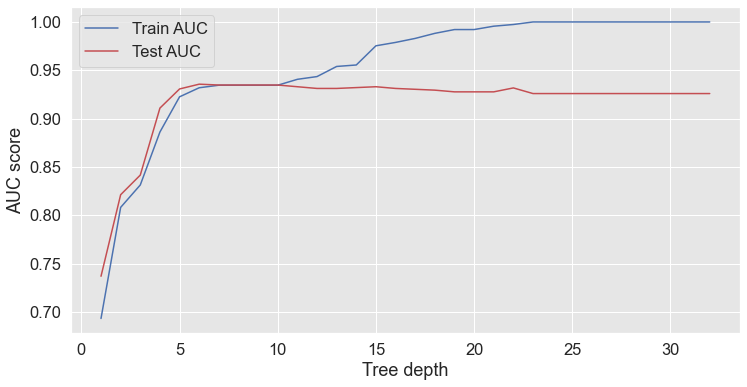

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


In [59]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state = 23)
    pipe_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipe_dt.fit(X_train, y_train)
    train_pred = pipe_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipe_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()
print(max_depths)

While the decreasing training error with increasing tree depth is a clear sign of overfitting, the optimal value seen here is about 6. After that the test accuracy is slowly decreasing.
Next up I will analyze the minimum number of samples required to split an internal node via **min sample splits**.

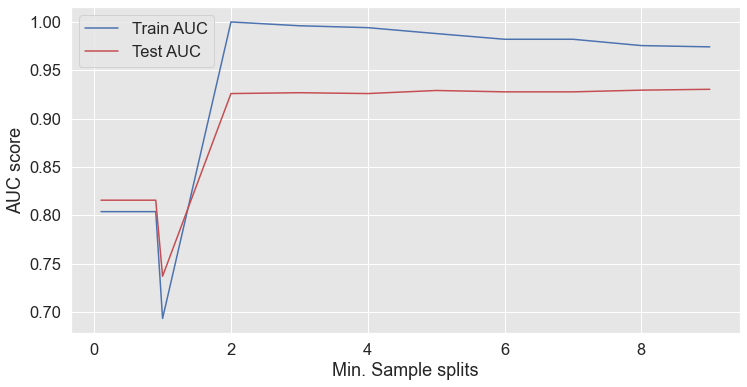

In [60]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_splits = np.append(min_samples_splits,np.array(range(2,10)))

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    if min_samples_split > 1:
        min_samples_split = int(min_samples_split)
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = min_samples_split,random_state = 23)
    pipe_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipe_dt.fit(X_train, y_train)
    train_pred = pipe_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipe_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

From the above plot, we see that the training and test accuracy stabilize at a minimum sample split size of 2. Next I will identify the **minimum number of samples that we want a leaf node to contain**.

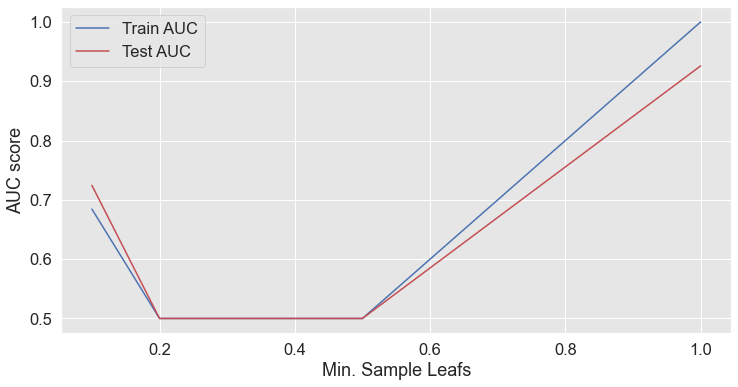

In [61]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
min_samples_leafs = np.append(min_samples_leafs,np.array(1))

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    if min_samples_leaf == 1.0:
        min_samples_leaf = int(min_samples_leaf)
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=23)
    pipe_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipe_dt.fit(X_train, y_train)
    train_pred = pipe_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipe_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

Since accuracy increases until 1, this will be our *minimum sample leaf*. Next I will identify the **number of features to consider when looking for the best split**.

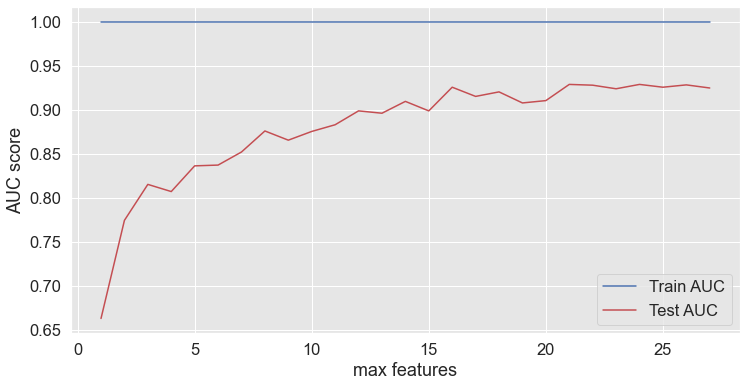

In [62]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=23)
    pipe_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipe_dt.fit(X_train, y_train)
    train_pred = pipe_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipe_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

Accuracy increases until around 22 features, oscillating from then onwards. As such, there is no max feature to be determined. I will next analyze the **weights associated with classes**.

AUC for None: 0.925926249868803

AUC for Balanced: 0.9232760731903579

AUC for 2 to 1: 0.921509288738061

AUC for 10 to 1: 0.9197425042857642

AUC for 100 to 1: 0.925926249868803



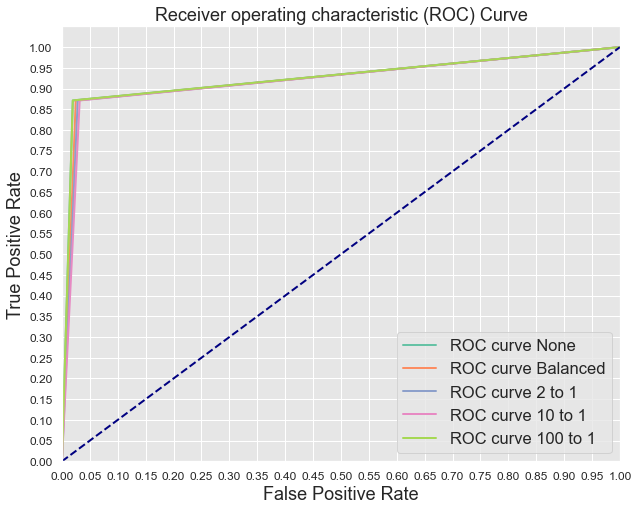

In [63]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', class_weight=weight, random_state=23)
    pipe_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipe_dt.fit(X_train, y_train)
    train_pred = pipe_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipe_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    print('AUC for {}: {}'.format(names[n], auc(false_positive_rate, true_positive_rate)))
    print()
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)], fontsize = 12)
plt.xticks([i/20.0 for i in range(21)], fontsize = 12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The highest accuracy in terms of AUC score is achieved with a 10 to 1 weight ratio (93.4%). Having identified several optimal hyperparameters, it is time to incorporate these into a new decision tree model.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_clf = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth = 6,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                class_weight = {1:10, 0:1},
                                random_state = 42)

pipe_dt = Pipeline(steps=[('ss', scaler), 
                          ('m', dt_clf)])

pipe_dt.fit(X_train, y_train)

preds = pipe_dt.predict(X_test)

print('Train Score:', pipe_dt.score(X_train, y_train))
print('Test Score:', pipe_dt.score(X_test, y_test))

Train Score: 0.977119279819955
Test Score: 0.967016491754123


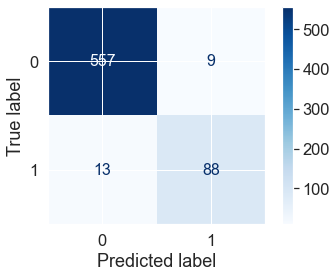


Testing Accuracy Score for the Decision Tree Classifier: 96.702%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.91      0.87      0.89       101

    accuracy                           0.97       667
   macro avg       0.94      0.93      0.93       667
weighted avg       0.97      0.97      0.97       667





Train AUC: 0.9543810344669497
Test AUC: 0.9282003288668088



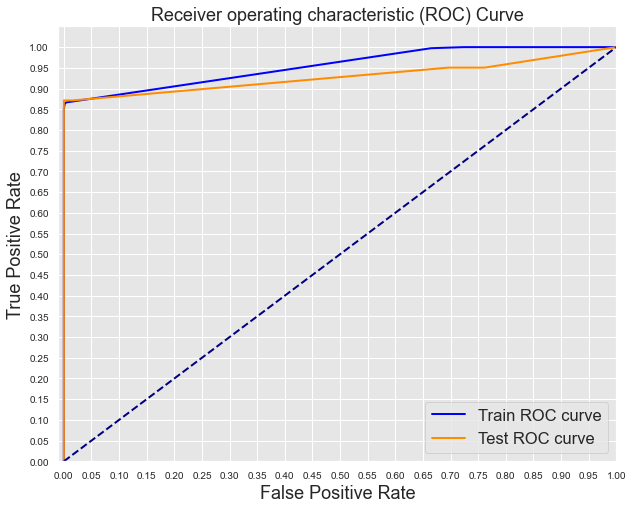

In [65]:
confusion_matrix(pipe_dt, X_test, y_test, 'Decision Tree')
print('\n' * 3)
plt_roc_prob(pipe_dt, X_train, X_test, y_train, y_test)

In [66]:
models.loc[6] = ['Decision Tree', 'Pruning/Tuning', pipe_dt.score(X_test, y_test), pipe_dt.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

Pruning and hyperparameter tuning have led to an increase in test accuracy from 95.05% to 97.8%. Interestingly enough, the prior perfect accuracy of the train score has been slightly reduced to 98.3%.

## Random Forest

Consecutively to the decision tree algorithm above, I will now create an ensemble of decision trees via Random Forest.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
scaler = StandardScaler()

rf_clf = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=20,random_state=42)

pipe_rf = Pipeline(steps=[('ss', scaler), 
                          ('m', rf_clf)])

pipe_rf.fit(X_train, y_train)

preds = pipe_rf.predict(X_test)

print('Train Score:', pipe_rf.score(X_train, y_train))
print('Test Score:', pipe_rf.score(X_test, y_test))

Train Score: 0.9553638409602401
Test Score: 0.9445277361319341


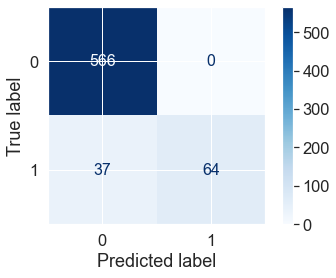


Testing Accuracy Score for the Decision Tree Classifier: 94.453%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       1.00      0.63      0.78       101

    accuracy                           0.94       667
   macro avg       0.97      0.82      0.87       667
weighted avg       0.95      0.94      0.94       667





Train AUC: 0.9376249300849984
Test AUC: 0.9226375817793794



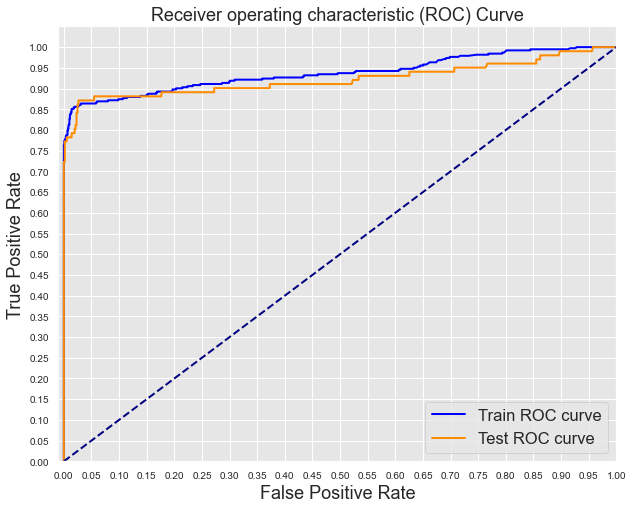

In [68]:
confusion_matrix(pipe_rf, X_test, y_test, 'Decision Tree')
print('\n' * 3)
plt_roc_prob(pipe_rf, X_train, X_test, y_train, y_test)

In [69]:
models.loc[7] = ['Random Forest', 'Base', pipe_rf.score(X_test, y_test), pipe_rf.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

Initial test scores are very strong. Let's see if they can be improved via implementation of the SMOTE technique.

In [70]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

scaler = StandardScaler()

rf_clf = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=20,random_state=42)

pipe_rf = Pipeline(steps=[('ss', scaler), 
                          ('m', rf_clf)])

pipe_rf.fit(X_train_resampled, y_train_resampled)

preds = pipe_rf.predict(X_test)

print('Train Score:', pipe_rf.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipe_rf.score(X_test, y_test))

Train Score: 0.9154991243432574
Test Score: 0.9430284857571214


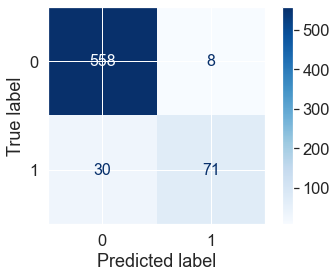


Testing Accuracy Score for the Random Forest Classifier: 94.303%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.90      0.70      0.79       101

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667





Train AUC: 0.9779195714649385
Test AUC: 0.9053720743099044



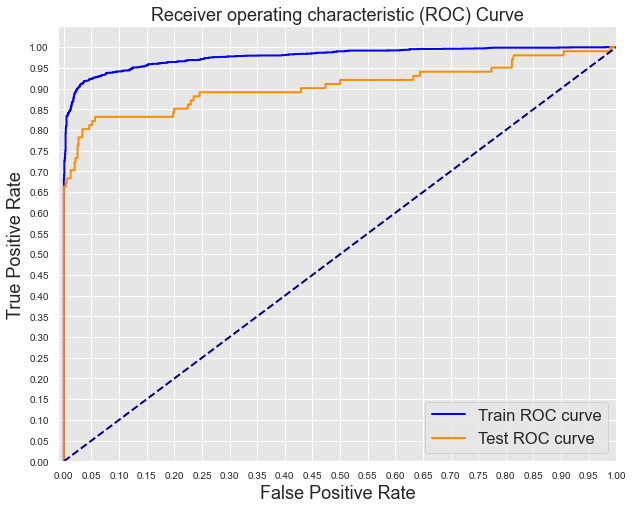

In [71]:
confusion_matrix(pipe_rf, X_test, y_test, 'Random Forest')
print('\n' * 3)
plt_roc_prob(pipe_rf, X_train_resampled, X_test, y_train_resampled, y_test)

In [72]:
models.loc[8] = ['Random Forest', 'SMOTE', pipe_rf.score(X_test, y_test), pipe_rf.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

Scores have slightly improved, but are not as good as the decision tree itself. I will go thus one step further and implement **Bagging** to encourage differences among the "trees in the forest" by training them on different samples of data (improving upon the greedy algorithm of decision trees that implies no randomness).

### Random Forests - Bagging

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

scaler = StandardScaler()
bg =  BaggingClassifier(DecisionTreeClassifier(criterion = 'entropy',
                                max_depth = 6,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                class_weight = {1:10, 0:1},
                                random_state = 23), 
                                n_estimators=20, 
                                random_state=42)

pipe_bg = Pipeline(steps=[('ss', scaler), 
                          ('m', bg)])

pipe_bg.fit(X_train, y_train)

preds = pipe_bg.predict(X_test)

print('Train Score:', pipe_bg.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipe_bg.score(X_test, y_test))

Train Score: 0.8347197898423818
Test Score: 0.9805097451274363


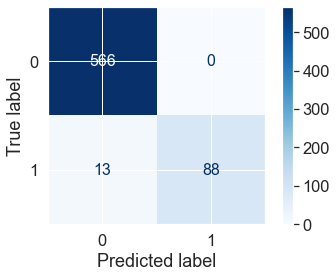


Testing Accuracy Score for the Bagged Decision Tree Classifier: 98.051%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667





Train AUC: 0.9892095937136098
Test AUC: 0.9330895987125213



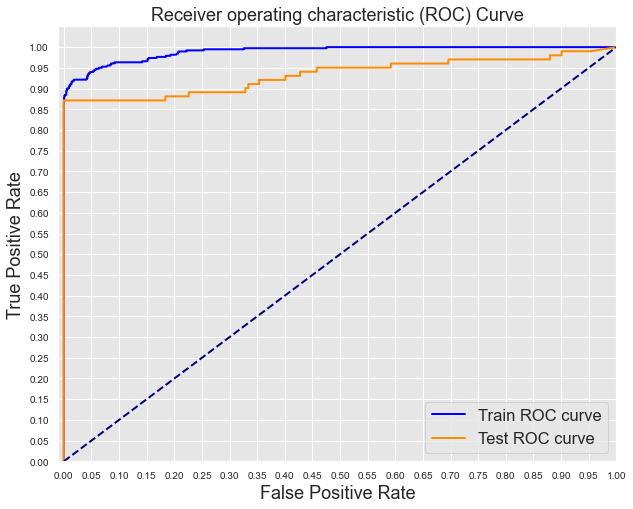

In [74]:
confusion_matrix(pipe_bg, X_test, y_test, 'Bagged Decision Tree')
print('\n' * 3)
plt_roc_prob(pipe_bg, X_train, X_test, y_train, y_test)

In [75]:
models.loc[9] = ['Random Forest', 'Bagging', pipe_bg.score(X_test, y_test), pipe_bg.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

### Random Forest - Discussion

While bagging classification has led to an improvement of the random forest algorithm, it has not surpassed the currently best-performing model. Next up I will apply a series of **Boost Algorithms** to see if they outperform the decision tree model.

### Adaboost

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

scaler = StandardScaler()

adb_clf = AdaBoostClassifier(random_state=42)


pipe_adb = Pipeline(steps=[('ss', scaler), 
                           ('m', adb_clf)])

pipe_adb.fit(X_train, y_train)

preds = pipe_adb.predict(X_test)

print('Train Score:', pipe_adb.score(X_train, y_train))
print('Test Score:', pipe_adb.score(X_test, y_test))

Train Score: 0.9264816204051013
Test Score: 0.9235382308845578


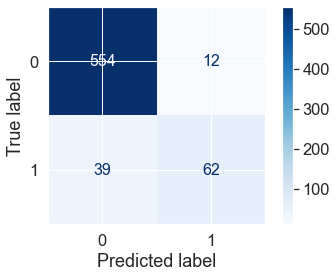


Testing Accuracy Score for the Adaboost Classifier: 92.354%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.84      0.61      0.71       101

    accuracy                           0.92       667
   macro avg       0.89      0.80      0.83       667
weighted avg       0.92      0.92      0.92       667





Train AUC: 0.9448599866129964
Test AUC: 0.8968267851520134



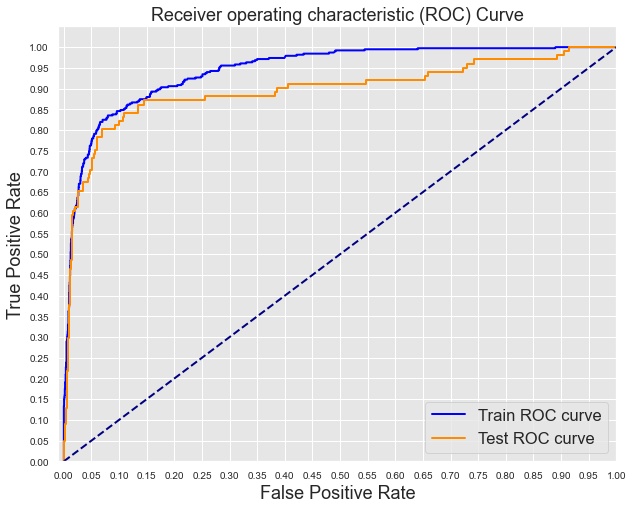

In [77]:
confusion_matrix(pipe_adb, X_test, y_test, 'Adaboost')
print('\n' * 3)
plt_roc_prob(pipe_adb, X_train, X_test, y_train, y_test)

In [78]:
models.loc[10] = ['Adaboost', 'Base', pipe_adb.score(X_test, y_test), pipe_adb.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

### Gradient Boost

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

scaler = StandardScaler()

gbt_clf = GradientBoostingClassifier(random_state=42)


pipe_gbt = Pipeline(steps=[('ss', scaler), 
                           ('m', gbt_clf)])

pipe_gbt.fit(X_train, y_train)

preds = pipe_gbt.predict(X_test)

print('Train Score:', pipe_gbt.score(X_train, y_train))
print('Test Score:', pipe_gbt.score(X_test, y_test))

Train Score: 0.9831207801950488
Test Score: 0.9790104947526237


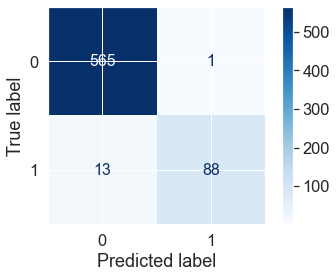


Testing Accuracy Score for the Gradient Boost Classifier: 97.901%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       0.99      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.98      0.93      0.96       667
weighted avg       0.98      0.98      0.98       667





Train AUC: 0.9954761555459789
Test AUC: 0.9154217541895532



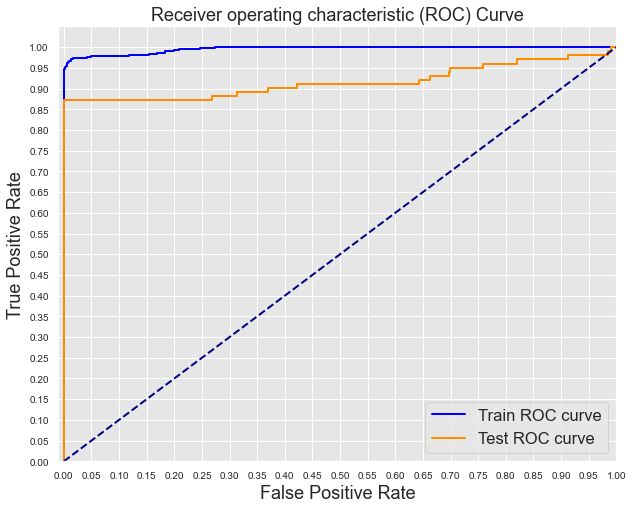

In [80]:
confusion_matrix(pipe_gbt, X_test, y_test, 'Gradient Boost')
print('\n' * 3)
plt_roc_prob(pipe_gbt, X_train, X_test, y_train, y_test)

In [81]:
models.loc[11] = ['Gradient Boost', 'Base', pipe_gbt.score(X_test, y_test), pipe_gbt.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

### XGBoost

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

scaler = StandardScaler()

xgb_clf = xgb.XGBClassifier(learning_rate=0.1,
                            max_depth=5,
                            random_state=42)

pipe_xgb = Pipeline(steps=[('ss', scaler), 
                           ('m', xgb_clf)])

pipe_xgb.fit(X_train, y_train)

preds = pipe_xgb.predict(X_test)

print('Train Score:', pipe_xgb.score(X_train, y_train))
print('Test Score:', pipe_xgb.score(X_test, y_test))

Train Score: 0.9831207801950488
Test Score: 0.9805097451274363


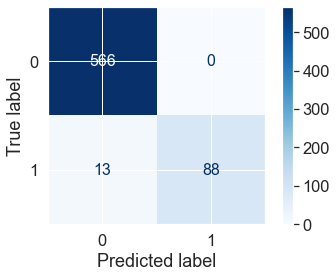


Testing Accuracy Score for the XGBoost Classifier: 98.051%

Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667





Train AUC: 0.9998212009792685
Test AUC: 0.9122205506769758



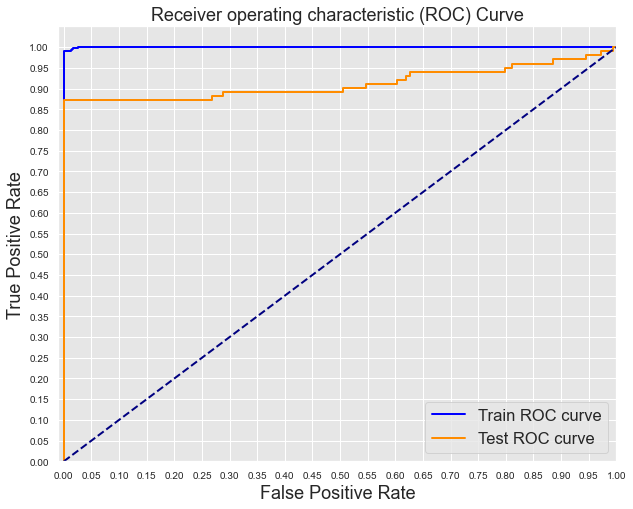

In [83]:
confusion_matrix(pipe_xgb, X_test, y_test, 'XGBoost')
print('\n' * 3)
plt_roc_prob(pipe_xgb, X_train, X_test, y_train, y_test)

In [84]:
models.loc[12] = ['XGBoost', 'Base', pipe_xgb.score(X_test, y_test), pipe_xgb.score(X_train, y_train), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds)]

### Feature Importance

As a final step, I will employ a gradient boost pipeline approach to rank the top 3 features in relation to customer churn.

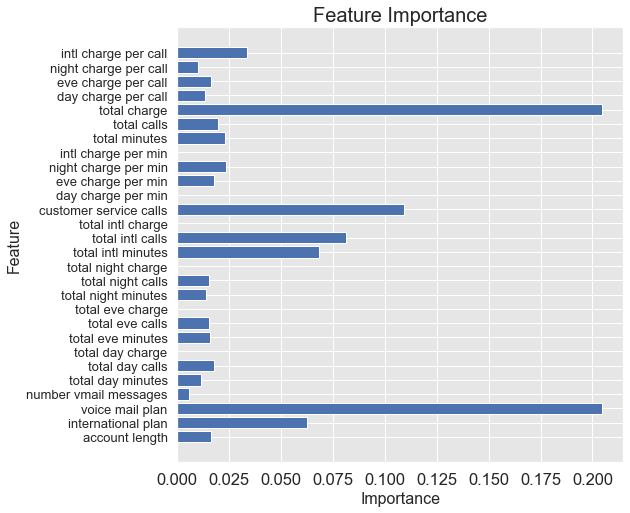

In [85]:
plt_feature_importances(pipe_xgb, X, X_train, True,'XGBoost')

The three most important features when analyzing customer churn are:
1. Total Charge
2. Voice Mail PLan
3. Number of Customer Service Calls

The above created bar plot **Total Charge vs Churn** already showed that discounts or other cost benefits are recommendable in order to avoid customer churn.

While the number of **customer service calls** has also been discussed during the EDA process at the beginning of this project, the **voice mail plan** appears to have similar characteristics as the **international plan** when it comes to importance regarding customer churn. Let's see how it affects churn.

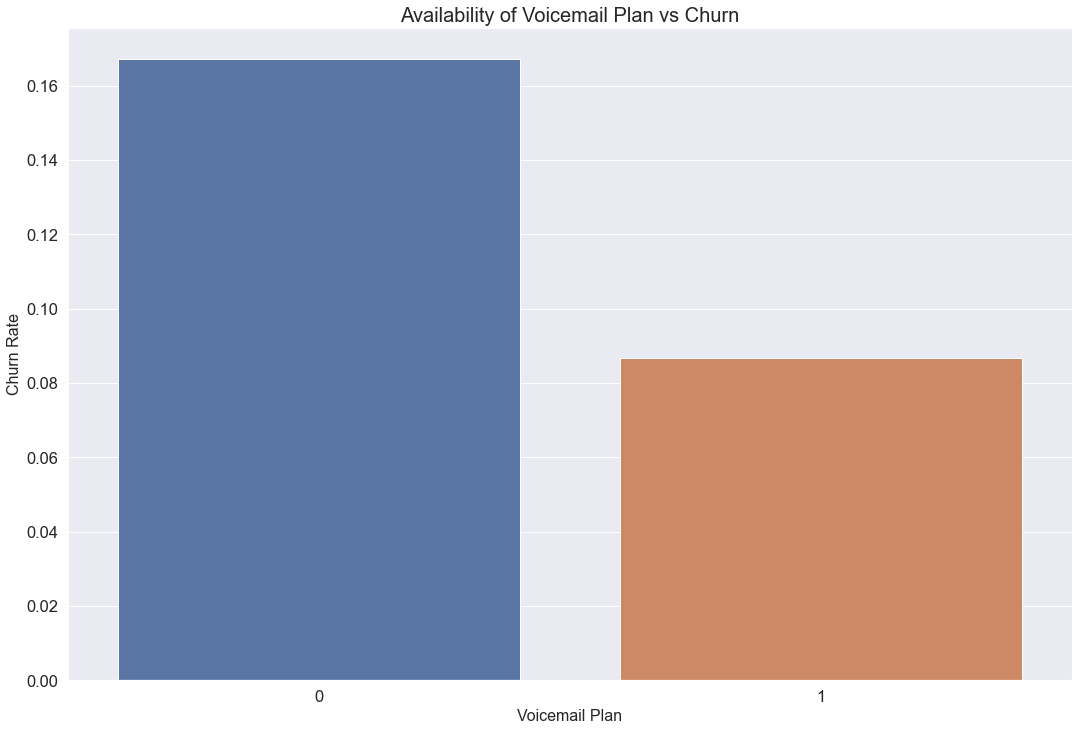

In [86]:
plt.figure(figsize=(18, 12))
sns.set_style('darkgrid')
sns.barplot(x = 'voice mail plan', y = 'churn',
                    data = data, ci = None);
plt.xlabel('Voicemail Plan',fontsize = 16);
plt.ylabel('Churn Rate',fontsize = 16);
plt.title('Availability of Voicemail Plan vs Churn',fontsize = 20);

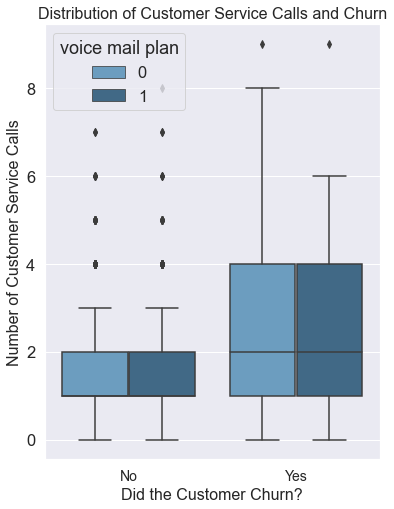

In [87]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.boxplot(x = 'churn', y = 'customer service calls', hue = 'voice mail plan',  palette = "Blues_d", data = data)
plt.title('Distribution of Customer Service Calls and Churn',fontsize = 16)
plt.ylabel('Number of Customer Service Calls',fontsize = 16)
plt.xlabel('Did the Customer Churn?',fontsize = 16)
g.set_xticklabels(["No",'Yes'], fontsize = 14)
plt.show(g)

Interestingly enough, the result is not as clear cut as with the international plan. While its effects on churn are undisputable, it does not seem to affect churn once the customer has made a decision to switch providers. As such, I would not consider it as aspect to to further analyze, unlike the international plan.

In [88]:
models = models.sort_values(by = 'Test Score', ascending=False)
models

,Model,Description,Test Score,Train Score,Precision,Recall,F1-Score
9,Random Forest,Bagging,0.980510,0.980495,1.000000,0.871287,0.931217
12,XGBoost,Base,0.980510,0.983121,1.000000,0.871287,0.931217
11,Gradient Boost,Base,0.979010,0.983121,0.988764,0.871287,0.926316
6,Decision Tree,Pruning/Tuning,0.967016,0.977119,0.907216,0.871287,0.888889
5,Decision Tree,Base,0.950525,1.000000,0.809091,0.881188,0.843602
7,Random Forest,Base,0.944528,0.955364,1.000000,0.633663,0.775758
8,Random Forest,SMOTE,0.943028,0.949737,0.898734,0.702970,0.788889
10,Adaboost,Base,0.923538,0.926482,0.837838,0.613861,0.708571
2,KNN,Base,0.898051,0.921980,0.902439,0.366337,0.521127
4,KNN,Best k,0.881295,0.900760,0.935484,0.230159,0.369427


### Potential Future Analysis - GridSearch

The above models and analyses could be expanded via **gridsearch** in order to find the best combination of parameters. The obvious drawback here is the result being only as good as the parameter input. But in order to validate the result, I first have to make a choice of those inputs, leading to a very time and resource intensive process to conduct an exhaustive search.

Since we already achieved very good results without gridsearch, I will skip this step for the current project.

### Conclusion

In order to determine the strongest predictors for customer churn I have started this project with simple Explanatory Data Analysis before diving into several different models. Some of the models created were able to predict customer churn quite accurately:

1. Random Forest with Bagging
1. XGBoost
2. Gradient Boost

The Random Forest algorithm with Bagging classifier and XGBoost have the highest a testing accuracy of 98.1%, closely followed by Gradient Boost with 97.9% accuracy.

From this model we were able to find three features that distinguish themselves from the rest::

1. Total Charge
2. Number of Customer Service Calls
3. International Plan

Explanatory Data Analysis in conjunctioin with analyzing feature importance, the following recommendations can be given to the stakeholders:

1. Focus on lower pricing or cost benefits such as discounts
3. Ensure higher quality customer service, reaching a benign solution for the customer after three customer service calls in order to avoid an increased potential for churn
3. Focus analytical efforts on the international plan as it has been shown that it has a strong influence on whether or not a customer is retained. Possible aspects to investigate are availability (churn is reduced among customer with international plans) and pricing (more affordable international plans might increase its presence, thus reducing customer churn.

These recommendations along with the results of the model give the stakeholders immense insight in working to decrease the amount of customers that churn and it is all credited to the OSEMiN Data Science Process.